In [1]:
#Preprocessing :
'''Missing and null value treatment 
univariate and bivariate analysis with visualization and without visualization 
Data exploration:
As part this project I want to explore answers to following questions.
How Survival is correlated to other attributes of the dataset ? Findout Pearson’s r.
Did Sex play a role in Survival ?
Did class played role in survival ?
How fare is related to Age, Class and Port of Embarkation ?
How Embarkation varied across different ports ?'''

'Missing and null value treatment \nunivariate and bivariate analysis with visualization and without visualization \nData exploration:\nAs part this project I want to explore answers to following questions.\nHow Survival is correlated to other attributes of the dataset ? Findout Pearson’s r.\nDid Sex play a role in Survival ?\nDid class played role in survival ?\nHow fare is related to Age, Class and Port of Embarkation ?\nHow Embarkation varied across different ports ?'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("titanic.csv")

In [4]:
#to show first 5 records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#to show no.of rows and columns in df
df.shape

(891, 12)

In [6]:
#to check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#to check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [9]:
#to fill null values in 'Age' column by mean
m=df['Age'].mean()

In [10]:
df['Age'].median()

28.0

In [11]:
#to find % of null values in 'Age' column
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
#to fill null values in 'Age' column by mean
df['Age'].fillna(m,inplace=True)

In [13]:
#To check
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#to check % of null values of 'Cabin' column
df['Cabin'].isnull().sum()/df.shape[0]*100

77.10437710437711

In [15]:
#we decide to remove column 'Cabin'
df.drop('Cabin',axis=1,inplace=True)

In [16]:
#to check
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [17]:
#now check null values in dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
#to check which type of values in 'Embarked' column
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
#we decide to delete those rows who found null
df.dropna(inplace=True)

In [20]:
#to check
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Q1. How Survival is correlated to other attributes of the dataset ? Findout Pearson’s r.

In [21]:
#Visualise

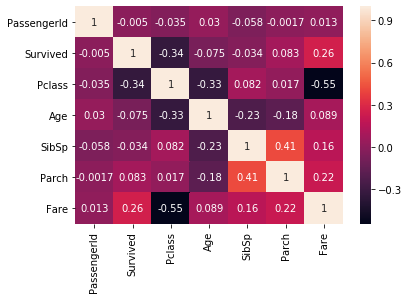

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
#From above heatmap, it is observed that
# There is no Correlation of survival with Parch,SibSp,Age,PassangerId 
# correlation Survived with Fare is 0.26 and with Pclass is -0.34 which is very bad score

# Q2. Did Sex play a role in Survival ?

In [24]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    231
          male      109
Name: Survived, dtype: int64

In [25]:
#Visualize

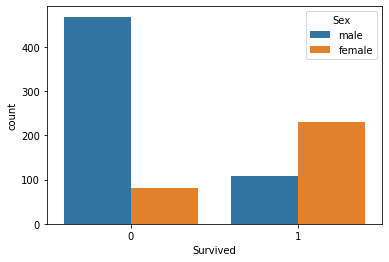

In [26]:
sns.countplot(data=df,x='Survived',hue='Sex')
plt.show()

In [27]:
#From above plot, it is observed that females survived more than male

# Q3. Did class played role in survival ?

In [28]:
df.groupby(['Survived','Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         134
          2          87
          3         119
Name: Survived, dtype: int64

In [29]:
#Visualise

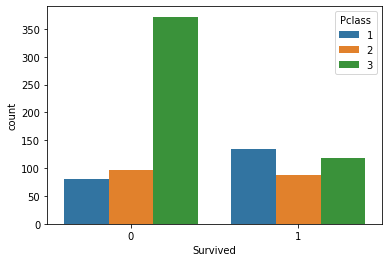

In [30]:
sns.countplot(data=df,x='Survived',hue='Pclass')
plt.show()

In [31]:
#From above, it is observed that,In Pclass1 Survived:134 and Died:80
#In Pclass2 Survived:87 and Died:97
#In Pclass3 Survived:119 and Died:372

# Q4.How fare is related to Age, Class and Port of Embarkation ?

Text(0.5, 1, 'Scatterplot of passengers w.r.t Fare and Age')

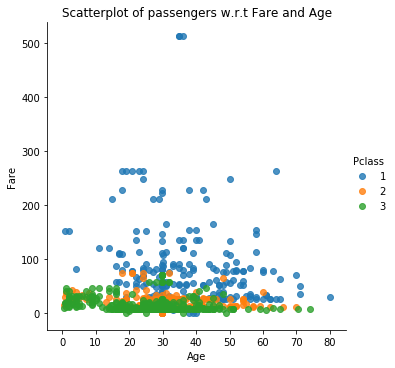

In [49]:
#seaborn.lmplot() method
#seaborn.lmplot() method is used to draw a scatter plot onto a FacetGrid.
sns.lmplot('Age', 'Fare', data=df,fit_reg=False, hue="Pclass")# scatter_kws={"marker": ".", "s": 20})
plt.title('Scatterplot of passengers w.r.t Fare and Age')

In [ ]:
#see above graph , From above visualization we can see that Fare is quite 
#uniform for Class 2 and 3 across all ages. Fare varies for Class 1 across 
#all ages, but we cannot conclude why it varies. We need more attributes to
#our data points to drill down to the reason for variation
#I will do a scatterplot of passengers from 3 classes for Age and Fare on X 
#and Y axis.

# Q5 How Embarkation varied across different ports ?

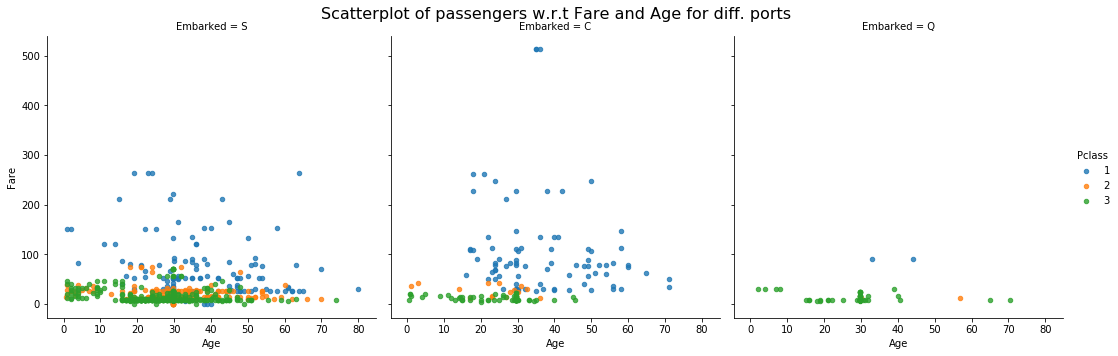

In [59]:
sns.lmplot('Age', 'Fare', data=df, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)
plt.show()

In [ ]:
#see this graph : We can also observe that lot of passengers embarked from port of 
#S means Southampton.

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
